## Conor Sayres
## Astro 519 2019
## Lab A2

### Sections 2.1 - 2.3

**Inspect hydorgen energy level diagram in Figure 7.  Which transistions correspond to they hydrogen lines in Figure 5?**

Figure 5 labels H_epsilon, H_delta, H_gamma, H_beta.  These are the Balmer transistions, which lie in the optical.

**Which transistions share the lower levels and which share the upper levels?**

They all share the lower level (s=2), no upper levels are shared.

**Why would Payne assume that the strength of the absorption line scales with population density of the lower level?**

A well populated level has a higher abundance of electrons in a configuration 'ready' to absorb photons of certain energies, leading to the presence of lines in the spectra.  If the level is not populated, no absorption for that specific line can happen.

**Use this expectation to give rough initial estimates of the strength ratios of the alpha lines in the Lyman, Balmer, Paschen, and Brackett series.**

There are a lot of pieces that go into this calculation, including temperature and incident radiation field.  However assuming most H atoms are in ground state, the Lyman line would be strongest, followed by Balmer, Paschen and Brackett.  I could hazard an assumption that the population of each energy level follows the relative spacing of energy levels in the hydrogen atom.  So Lyman population is 10.2/13.6, Balmer is (12.09-10.2)/13.6, etc...

**Explain from (1) and (3) why Saha and Boltzman distributions behave differently for increasing temperature**

The Saha equation must account for the kinetic energy of the liberated electron (it is no longer bound).

**Speculate how ionization can fully deplete a stage while excitation puts only a few atoms in levels just below the ionization level.**

My guess is this is related to the fact that downward transitions happen very quickly, so the chance of finding electrons in upper levels is low, and once in an upper level it is then easily ionized.

### Section 2.4

imports and constants...

In [3]:
import numpy
import matplotlib.pyplot as plt

# constants
kErg = 1.38065e-16  # erg/K
kEv = 8.61734e-5  # eV/K
h = 6.62607e-27 # erg s
elmass = 9.109390e-28 # electrong mass g

Compute partition functions U_r of the Schadee element, and compare to table on page 12.

In [4]:
chiion = numpy.array([7, 16, 31, 51])  # eV
temps = numpy.array([5000, 10000, 20000])

u = []
for temp in temps:
    for r in range(4):
        U = 0
        for s in range(chiion[r]):
            U += numpy.exp(-1*s/(kEv*temp))
        print("U(r=%i, T=%i) = %.2f"%(r+1, temp, U))
        u.append(U)

U(r=1, T=5000) = 1.11
U(r=2, T=5000) = 1.11
U(r=3, T=5000) = 1.11
U(r=4, T=5000) = 1.11
U(r=1, T=10000) = 1.46
U(r=2, T=10000) = 1.46
U(r=3, T=10000) = 1.46
U(r=4, T=10000) = 1.46
U(r=1, T=20000) = 2.23
U(r=2, T=20000) = 2.27
U(r=3, T=20000) = 2.27
U(r=4, T=20000) = 2.27


Turn above into a function.

In [5]:
def partfunc_E(temp):
    """partition functions Schadee element
    input: temp(K)
    output: numpy array(4), partition functions U1,...U4
    """
    u = []
    for r in range(4):
        U = 0
        for s in range(chiion[r]):
            U += numpy.exp(-1*s/(kEv*temp))
        u.append(U)
    return u

Check results against lab output.

In [6]:
for temp in temps:
    output = partfunc_E(temp)
    # convert to output string
    outStr = " ".join(["%.5f"%x for x in output])
    print("parfunc_E(temp=%i) = %s" %(temp, outStr))

parfunc_E(temp=5000) = 1.10887 1.10887 1.10887 1.10887
parfunc_E(temp=10000) = 1.45590 1.45634 1.45634 1.45634
parfunc_E(temp=20000) = 2.23243 2.27134 2.27155 2.27155


Write Boltzmann routine

In [7]:
def boltz_E(temp, r, s):
    """compute Boltzmann population for level r, s of Schadee element E
    input: temp (K)
           r, ionization stage nr, 1-4 where 1= neutral E
           s, level nr, starting at s=1
    output: reletive level population n_(r,s)/N-r
    """
    u = partfunc_E(temp)
    relnrs = 1 / u[r-1] * numpy.exp(-(s-1)/(kEv*temp))
    return relnrs

Check results against lab output

In [9]:
for s in range(1,11):
    print(boltz_E(5000,1,s))

0.9018150778395451
0.0885447147611472
0.008693762950731983
0.0008535971282690808
8.381043531073883e-05
8.228927715840783e-06
8.079572800388046e-07
7.932928674425744e-08
7.788946137165067e-09
7.647576880810704e-10


Write Saha routine.

In [10]:
def saha_E(temp, elpress, ionstage):
    """compute Saha population fraction N_r/N for Schadee element E
    input: temperature (K)
           electron pressure
           ion stage
    return population fraction
    """
    kevT = kEv*temp
    kergT = kErg*temp
    eldens = elpress/kergT
    u = partfunc_E(temp)
    u = u + [2.0]
    # print("uuu", u)
    sahaconst = (2 * numpy.pi * elmass * kergT / (h**2))**1.5 * 2 / eldens
    nstage = numpy.zeros(5)
    nstage[0] = 1
    for r in range(4):
        nstage[r+1] = nstage[r] * sahaconst*u[r+1]/u[r] * numpy.exp(-chiion[r]/kevT)
    ntotal = numpy.sum(nstage)
    nstagerel=nstage/ntotal
    return nstagerel[ionstage-1]

Check output against lab.

In [11]:
for r in range(1,6):
    print(saha_E(20000,1e3,r))

2.727844688475404e-10
0.00018028203448849963
0.6320087290304419
0.3678092689510845
1.719711200572586e-06


In [12]:
for r in range(1,6):
    print(saha_E(20000,1e1,r))

7.287830305914885e-16
4.8164944291296904e-08
0.016885024240896523
0.9826554819571726
0.0004594456369859842


### Section 2.5

Write Saha-Boltzmann routine.

In [13]:
def sahabolt_E(temp, elpress, ion, level):
    """compute Saha-Boltzmann population n_(r,s)/N for level r,s of E
    input: temp (K)
           electron pressure
           ionization stage
           level nr
    """
    return saha_E(temp, elpress, ion) * boltz_E(temp, ion, level)

Check output.

In [14]:
for s in range(1,6):
    print(sahabolt_E(5000,1e3,1,s))

0.8170946483389763
0.0802264392644223
0.007877033058693968
0.0007734065026026118
7.593691861021326e-05


In [15]:
for s in range(1,6):
    print(sahabolt_E(20000,1e3,1,s))

1.2219168315597123e-10
6.83995012366083e-11
3.8288135890925846e-11
2.1432632161027975e-11
1.1997390592703075e-11


In [16]:
for s in range(1,6):
    print(sahabolt_E(10000,1e3,2,s))

0.6489547450321719
0.2033466339369162
0.06371762260775869
0.019965589556030065
0.006256114870665582


In [17]:
for s in range(1,6):
    print(sahabolt_E(20000,1e3,4,s))

0.16191988354716885
0.09063824139961384
0.050736763293320164
0.028401027091125446
0.015898104007297565


Plot ground-state populations for Payne's pressure and a range of temperatures.

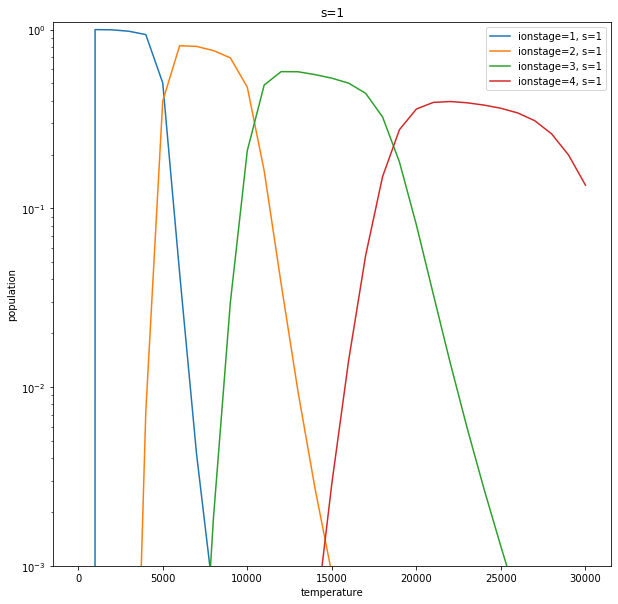

In [24]:
temp = numpy.arange(0, 30001, 1000)
pop = numpy.zeros((5, len(temp), 4))
for s in [1,2,3,4]:
    for T in range(1,31):
        for r in range(1,5):
            pop[r,T,s-1] = sahabolt_E(temp[T], 131, r, s)
fig = plt.figure(figsize=(10,10))
for ionStage in [1,2,3,4]:
    for s in [1]:
        plt.semilogy(temp, pop[ionStage, :, s-1], label="ionstage=%i, s=%i"%(ionStage, s))
plt.legend()
plt.title("s=1")
plt.ylim([1e-3, 1.1])
plt.xlabel("temperature")
plt.ylabel("population");

Add higher values of s to the plot

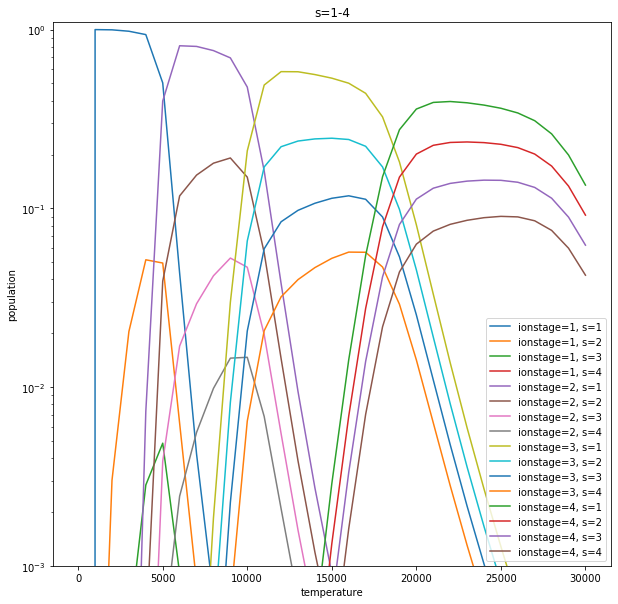

In [23]:
fig = plt.figure(figsize=(10,10))
for ionStage in [1,2,3,4]:
    for s in [1,2,3,4]:
        plt.semilogy(temp, pop[ionStage, :, s-1], label="ionstage=%i, s=%i"%(ionStage, s))
plt.legend()
plt.title("s=1-4")
plt.ylim([1e-3, 1.1])
plt.xlabel("temperature")
plt.ylabel("population");

### Section 2.7

Write a Saha-Boltzman routine for hydrogen.

In [25]:
def sahabolt_H(temp, elpress, level, doPrint=False):
    """compute Saha-Boltzmann population n_(1,s)/N_H for hydrogen level
    intpu: temp (K)
           electron pressure
           level number
    """
    kevT = kEv*temp
    kergT = kErg*temp
    eldens = elpress/kergT
    nrlevels = 100
    g = numpy.zeros((2,nrlevels))
    chiexc = numpy.zeros((2,nrlevels))
    for s in range(nrlevels):
        g[0,s] = 2*(s+1)**2
        chiexc[0,s] = 13.598*(1 - 1/(s+1)**2)
    g[1,0] = 1
    chiexc[1,0] = 0
    u = numpy.zeros(2)
    u[0] = 0
    for s in range(nrlevels):
        u[0] = u[0] + g[0,s] * numpy.exp(-chiexc[0,s]/kevT)
    u[1] = g[1,0]
    sahaconst = (2*numpy.pi*elmass*kergT/h**2)**1.5 * 2/eldens
    nstage = numpy.zeros(2)
    nstage[0] = 1
    nstage[1] = nstage[0] * sahaconst * u[1]/u[0] * numpy.exp(-13.598/kevT)
    ntotal = numpy.sum(nstage)
    nlevel = nstage[0]*g[0, level-1]/u[0]*numpy.exp(-chiexc[0, level-1]/kevT)
    nlevelrel=nlevel/ntotal
    # print parameters
    if doPrint:
        print(u)
        for s in range(6):
            print(s+1, g[0,s], chiexc[0,s], g[0,s]*numpy.exp(-chiexc[0,s]/kevT))
        print("")
        for s in numpy.arange(0,91,10):
            print(s+1, g[0,s], chiexc[0,s], g[0,s]*numpy.exp(-chiexc[0,s]/kevT))
    return nlevelrel

Check output:

In [27]:
sahabolt_H(5000,1e2,1, doPrint=True);

[2.00000001 1.        ]
1 2.0 0.0 2.0
2 8.0 10.198500000000001 4.20206203844583e-10
3 18.0 12.087111111111112 1.1803484956016147e-11
4 32.0 12.748125 4.524968596511019e-12
5 50.0 13.05408 3.47573590076269e-12
6 72.0 13.220277777777778 3.4032151494712673e-12

1 2.0 0.0 2.0
11 242.0 13.485619834710745 6.179018030053386e-12
21 882.0 13.56716553287982 1.863709846580077e-11
31 1922.0 13.58385015608741 3.907021049786122e-11
41 3362.0 13.589910767400358 6.738779628059456e-11
51 5202.0 13.59277201076509 1.0357856476189848e-10
61 7442.0 13.594345606019887 1.4763967950888014e-10
71 10082.0 13.595302519341402 1.9957015552401295e-10
81 13122.0 13.59592745008383 2.5936957721575095e-10
91 16562.0 13.596357927786501 3.270377445047371e-10


### Section 2.8

**Explain qualitively why the solar Ca+K line is much stronger than the solar H_alpha line***

Strong balmer absorption requires a population of hydrogen in the s=2 state, which for the temperature of the sun, is low.

Computing the expected strength ratio for these two lines:

In [28]:
def partfunc_Ca(temp):
    """partition functions Ca
    input: temp(K)
    output: numpy array(4), partition functions U1,...U4
    """
    chiion = [6.113, 11.871, 50.91, 67.15]
    u = []
    for r in range(4):
        U = 0
        for s in range(int(numpy.floor(chiion[r]))):
            U += numpy.exp(-1*s/(kEv*temp))
        u.append(U)
    return u

def boltz_Ca(temp, r, s):
    """compute Boltzmann population for level r, s of Schadee element E
    input: temp (K)
           r, ionization stage nr, 1-4 where 1= neutral E
           s, level nr, starting at s=1
    output: reletive level population n_(r,s)/N-r
    """
    u = partfunc_Ca(temp)
    relnrs = 1 / u[r-1] * numpy.exp(-(s-1)/(kEv*temp))
    return relnrs

def saha_Ca(temp, elpress, ionstage):
    """compute Saha population fraction N_r/N for Ca
    input: temperature (K)
           electron pressure
           ion stage
    return population fraction
    """
    chiion = [6.113, 11.871, 50.91, 67.15]
    kevT = kEv*temp
    kergT = kErg*temp
    eldens = elpress/kergT
    u = partfunc_Ca(temp)
    u = u + [2.0]
    # print("uuu", u)
    sahaconst = (2 * numpy.pi * elmass * kergT / (h**2))**1.5 * 2 / eldens
    nstage = numpy.zeros(5)
    nstage[0] = 1
    for r in range(4):
        nstage[r+1] = nstage[r] * sahaconst*u[r+1]/u[r] * numpy.exp(-chiion[r]/kevT)
    ntotal = numpy.sum(nstage)
    nstagerel=nstage/ntotal
    return nstagerel[ionstage-1]

def sahabolt_Ca(temp, elpress, ion, level):
    """compute Saha-Boltzmann population n_(r,s)/N for level r,s of E
    input: temp (K)
           electron pressure
           ionization stage
           level nr
    """
    return saha_Ca(temp, elpress, ion) * boltz_Ca(temp, ion, level)

Solar line strength check:


Ca/H ratio at 5000 K = [7643.54768194]


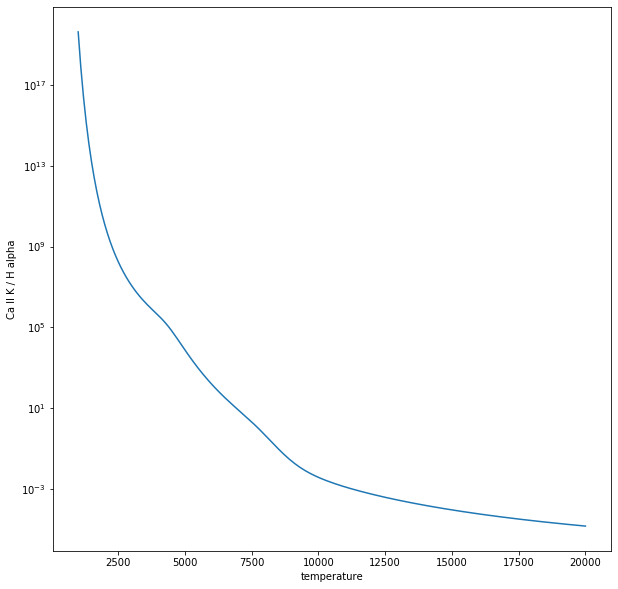

In [31]:
temp = numpy.arange(1000,20001,100)
CaH = numpy.zeros(temp.shape)
Caabund=2e-6
for i in range(191):
    NCa = sahabolt_Ca(temp[i], 1e2, 2, 1)
    NH = sahabolt_H(temp[i], 1e2, 2)
    CaH[i] = NCa*Caabund/NH

plt.figure(figsize=(10,10))
plt.semilogy(temp, CaH)
plt.xlabel("temperature")
plt.ylabel("Ca II K / H alpha")

print("")
print("Ca/H ratio at 5000 K =", CaH[temp==5000])

### Section 2.9

Plot relative population changes for two lower levels as a function of temperature for small temperature change deltaT.

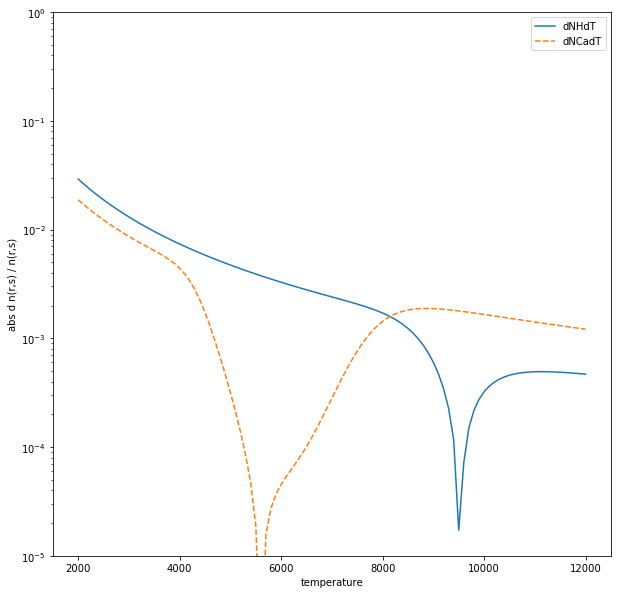

In [33]:
temp = numpy.arange(2000, 12001, 100)
dNCadT = numpy.zeros(temp.shape)
dNHdT = numpy.zeros(temp.shape)
dT = 1
for i in range(101):
    NCa = sahabolt_Ca(temp[i], 1e2, 2, 1)
    NCa2 = sahabolt_Ca(temp[i]-dT, 1e2, 2, 1)
    dNCadT[i] = (NCa - NCa2)/dT/NCa
    NH = sahabolt_H(temp[i], 1e2, 2)
    NH2 = sahabolt_H(temp[i]-dT, 1e2, 2)
    dNHdT[i] = (NH - NH2)/dT/NH

plt.figure(figsize=(10,10))
plt.semilogy(temp, numpy.abs(dNHdT), label="dNHdT")
plt.ylim([1e-5, 1])
plt.xlabel("temperature")
plt.ylabel("abs d n(r,s) / n(r,s)")
plt.semilogy(temp, numpy.abs(dNCadT), "--", label="dNCadT")
plt.legend();

### Section 2.10

Find at which temperature the hydrogen in the stellar photospheres with P_e = 10^2 is 50 percent ionized.

2000 1.0
4000 0.999999999972053
6000 0.9999635010178057
8000 0.9499170888099736
10000 0.17471674819348892
12000 0.009616406956648386
14000 0.001010308105194544
16000 0.00017721210034890846
18000 4.416811131346042e-05
20000 1.4133065373257084e-05


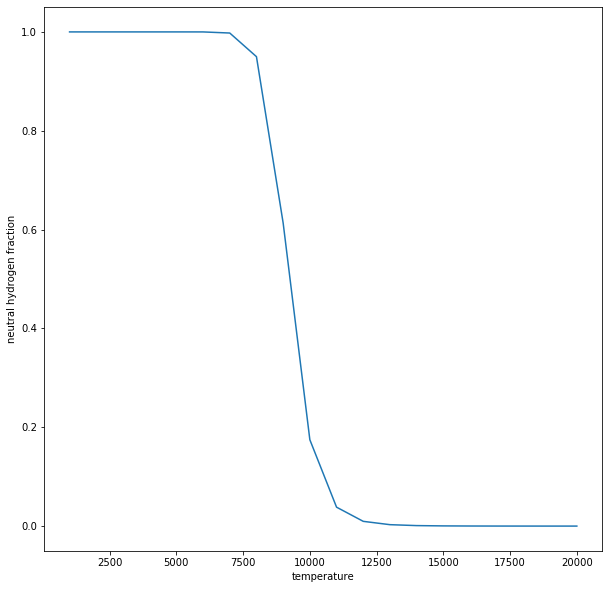

In [35]:
for temp in numpy.arange(2000, 20001, 2000):
    print(temp, sahabolt_H(temp, 1e2, 1))

temps = numpy.arange(1000, 20001, 1000)
nH = []
for temp in temps:
    nH.append(sahabolt_H(temp, 1e2, 1))
plt.figure(figsize=(10,10))
plt.plot(temps, nH)
plt.xlabel("temperature")
plt.ylabel("neutral hydrogen fraction")
plt.show();

This appears to be around the 9000 K temperature.